## Intelie - Desafio 1

### Biblioteca para uso do Plotly

In [1]:
import cufflinks as cf
cf.go_offline()

### Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

vg_df = pd.read_csv('vgsales.csv')

### Lendo as primeiras linhas do dataset

In [3]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Checando a estrutura quanto à valores ausentes, duplicados etc...

In [4]:
vg_df.shape

(16598, 11)

In [5]:
vg_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
vg_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Normalizando valores ausentes e checando as correções

In [7]:
mean = vg_df['Year'].mean()
vg_df['Year'].fillna(mean, inplace=True)

In [8]:
sum(vg_df.duplicated())

0

In [9]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
vg_df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [11]:
import plotly 
import plotly.graph_objs as go
import plotly.offline as py

In [12]:
# habilita o modo offline
plotly.offline.init_notebook_mode(connected=True)

<Figure size 432x288 with 0 Axes>

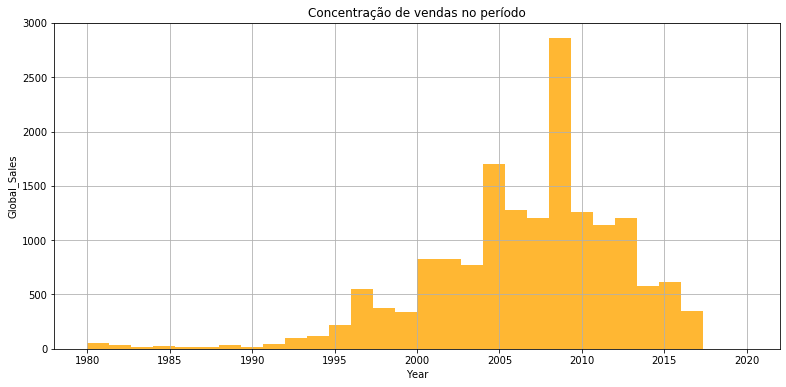

In [13]:
plt.figure();
vg_df.hist(column='Year', color=('orange'), alpha= 0.8, bins=30, figsize=(13,6))
plt.title('Concentração de vendas no período')
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.show()

## Perguntas de interesse
#### - Quais são as vendas dos três maiores games nas cinco regiões
#### - Quais as vendas dos três maiores games em 2014
#### - Como os consoles de jogos se posicionavam em 2014 e 2015
#### - Qual a relação das outras vendas e venda global no ranking dos 100 melhores
#### - Qual a relação de venda global em cada ano
#### - Em que período de ano se registrou as maiores vendas
#### - Qual gênero de vídeo game têm as maiores vendas globais
#### - Qual fabricante teve as maiores vendas
#### - Quais foram os cinco maiores editores de game de cada ano
#### - Qual foi o jogo mais popular na América do Norte

### Quais são os os três maiores games nas regiões estudadas

In [ ]:
- Grand Theft Auto V;
- Pokemon Omega Ruby/Alpha Sapphire;
- e Call of Duty:Advanced Warfare

In [14]:
year_2014 = vg_df[vg_df.Year == 2014].iloc[:3,:]

linha1 = go.Bar(
    x = year_2014.Name,
    y = year_2014.NA_Sales,
    name = 'Sales in North America',
    marker = dict(color = 'rgb(88, 24, 69)'),
    text = year_2014.Genre
)
linha2 = go.Bar(
    x = year_2014.Name,
    y = year_2014.EU_Sales,
    name = 'Sales in Europe',
    marker = dict(color = 'rgb(144,12,63)'),
    text = year_2014.Genre
)
linha3 = go.Bar(
    x = year_2014.Name,
    y = year_2014.Global_Sales,
    name = 'Global Sales',
    marker = dict(color = 'rgb(199,0,57)'),                
    text = year_2014.Genre
)
linha4 = go.Bar(
    x = year_2014.Name,
    y = year_2014.Other_Sales,
    name = 'Other Sales',
    marker = dict(color = 'rgb(255, 87,51)'),                
    text = year_2014.Genre
)
linha5 = go.Bar(
    x = year_2014.Name,
    y = year_2014.JP_Sales,
    name = 'Sales in Japan',
    marker = dict(color = 'rgb(255,195,0)'),                
    text = year_2014.Genre
)
data = [linha1, linha2, linha3, linha4, linha5]
layout = go.Layout(barmode = "group")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Quais as vendas dos maiores games em 2014

- Resposta disponibilizada no gráfico

In [15]:
ano_2014 = vg_df[vg_df.Year == 2014].iloc[:5,:]
x = ano_2014.Name

linha1 = {
  'x': x,
  'y': ano_2014.NA_Sales,
  'name': 'Vendas na América do Norte',
  'marker' : dict(color = 'rgb(75, 56, 50)'),
  'type': 'bar'
};
linha2 = {
  'x': x,
  'y': ano_2014.EU_Sales,
  'name': 'Vendas na Europa',
  'marker' : dict(color = 'rgb(133,68,66)'),
  'type': 'bar'
};
linha3 = {
  'x': x,
  'y': ano_2014.JP_Sales,
  'name': 'Vendas no Japão',
  'marker' : dict(color = 'rgb(255,244,230)'),
  'type': 'bar'
};
linha5 = {
  'x': x,
  'y': ano_2014.Global_Sales,
  'name': 'Vendas Globais',
  'marker' : dict(color = 'rgb(60,47,47)'),
  'type': 'bar'
};
linha4 = {
  'x': x,
  'y': ano_2014.Other_Sales,
  'name': 'Outras Vendas',
  'marker' : dict(color = 'rgb(236,185,57)'),
  'type': 'bar'
};

data = [linha1, linha2, linha3, linha5, linha4];
layout = {
  'xaxis': {'title': 'Os maiores games em 2014'},
  'barmode': 'relative',
  'title': 'Vendas na América do Norte, Japão, Outras Vendas, Vendas Globais dos mais tops em 2014'
};
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Como os consoles de jogos se posicionavam em 2014 e 2015.

- Destaque para as plataformas PS4 e PSV e queda dos consoles WiiU e PS3

In [16]:
ano_2015 = vg_df.Platform[vg_df.Year == 2015]
ano_2014 = vg_df.Platform[vg_df.Year == 2014]

linha1 = go.Histogram(
    x=ano_2014,
    opacity=0.6,
    name = "2014",
    marker=dict(color='rgb(0,0,0)'))
linha2 = go.Histogram(
    x=ano_2015,
    xaxis = 'x2',
    yaxis = 'y2',
    opacity=1.0,
    name = "2015",
    marker=dict(color='rgb(255,196,37)'))

data = [linha1,linha2]
layout = go.Layout(barmode='overlay',
                   title=' Resultado de 2014 e 2015',
                   xaxis2=dict(title='Platform',domain=[0.6, 0.95],anchor='y2'),
                   yaxis2=dict( title='Count',domain=[0.6, 0.95],anchor='y2'),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Qual a relação das outras vendas e vendas globais ao ranking dos 100 melhores video games

- As outras vendas se mantiveram niveladas no período, ao passo que a venda global experimentou forte
- baixa no início da medida, seguida de estabilização e tendência de leve queda durante todo o período. 

In [17]:
df = vg_df.iloc[:100,:]

linha1 = go.Scatter(
    x = df.Rank,
    y = df.Other_Sales,
    mode = "lines",
    name = "Outras Vendas",
    marker = dict(color = 'rgb(0, 0, 0)'),
    text = df.Name
)
linha2 = go.Scatter(
    x = df.Rank,
    y = df.Global_Sales,
    mode = "lines",
    name = 'Venda Global',
    marker = dict(color = 'rgb(255, 215, 0)'),
    text = df.Name
)

data = [linha1, linha2]
layout = dict(title = "Outras Vendas e Vendas Globais vs Ranking dos 100 video games",
             xaxis = dict(title='Ranking', ticklen = 20, zeroline = False)
             )
fig = dict(data=data, layout=layout)
py.iplot(fig)

### Relação de vendas globais em relação à cada ano, com destaque para um outlier

- Se observa no gráfico leve concentração entre os anos de 2005 e 2008

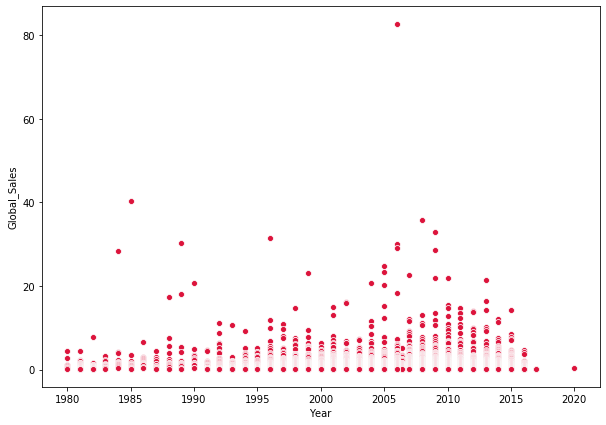

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=vg_df, x='Year', y='Global_Sales', color='crimson')
plt.show()

### Em que período de ano se registra as maiores vendas 

- O gráfico aponta para 2008, com forte alta no início dos anos 2000 e queda na década seeguinte 

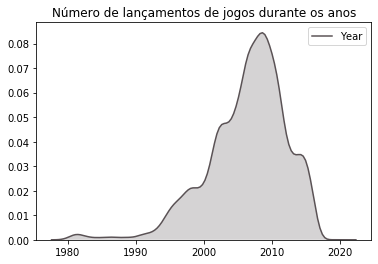

In [19]:
sns.kdeplot(data=vg_df['Year'], label='Year', color='#5a5255',shade=True)
plt.title('Número de lançamentos de jogos durante os anos')
plt.show()

### Qual gênero de video game têm as maiores vendas globais

- Action com 19,6%

In [20]:
genre = vg_df.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

### Qual fabricante de video game teve as maiores vendas

- Nintendo, a empresa possui 31% fatia de mercado, seguido da Electronic Arts com 19.3%

In [21]:
# Qual fabricante de video game teve as maiores vendas:Nintendo
rank = vg_df.loc[:,['Publisher','Global_Sales']]
rank['total_sales'] = rank.groupby('Publisher')['Global_Sales'].transform('sum')
rank.drop('Global_Sales', axis=1, inplace=True)
rank = rank.drop_duplicates()
rank = rank.head(10)

fig = px.pie(rank, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=50, pull=[0.11,0.1,0.1,0.1,0.1], textinfo="percent+label")
fig.show()

### Quais são os cinco maiores editores de game por ano

- Resposta disponibilizada no gráfico

In [22]:
best_5 = ['Nintendo', 'Electronic Arts', 'Activision', 'Ubisoft', 'Sony Computer Entertainment']
mod = vg_df.loc[:,["Year","Publisher",'Global_Sales']]
mod['total_sales'] = mod.groupby([mod.Publisher,mod.Year])['Global_Sales'].transform('sum')
mod.drop('Global_Sales', axis=1, inplace=True)
mod = mod.drop_duplicates()
mod = mod[(mod['Year'].astype('float')>=2006.0)]
mod = mod.sort_values("Year",ascending = False)
mod = mod.loc[mod['Publisher'].isin(best_5)]
mod = mod.sort_values("Year")
fig=px.bar(mod,x='Publisher', y="total_sales", animation_frame="Year", 
           animation_group="Publisher", color="Publisher", hover_name="Publisher")
fig.show()

### Qual o jogo mais popular na América do Norte

- Super Mario Bros com 26.2%, seguido do Dunk Hunt com 24.3%

In [23]:
jogo = vg_df.loc[vg_df['Name']!='Wii Sports',['Name','NA_Sales']]
jogo = jogo.sort_values('NA_Sales', ascending=False)
jogo = jogo.head()

fig = px.pie(jogo, names='Name', values='NA_Sales', template='seaborn')
fig.update_traces(rotation=50, pull=0.05, textinfo="percent+label")
fig.show()

### Mapa de calor para melhor visualização

In [24]:
mapa = pd.crosstab(vg_df['Platform'], vg_df['Genre'])
mapa.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [25]:
mapa['Total'] = mapa.sum(axis=1)
mapa.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163


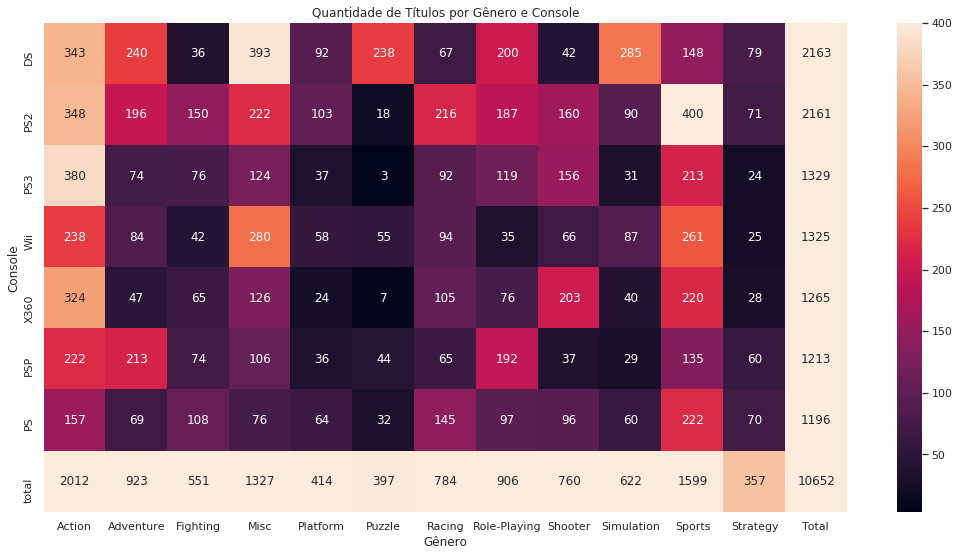

In [26]:
best_10 = mapa[mapa['Total'] > 1000].sort_values('Total', ascending = False)
the_best = best_10.append(pd.DataFrame(best_10.sum(), columns=['total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(the_best, annot=True, vmax=the_best.loc[:'PS', :'Strategy'].values.max(), vmin=the_best.loc[:,
:'Strategy'].values.min(), fmt='d')
plt.xlabel('Gênero')
plt.ylabel('Console')
plt.title('Quantidade de Títulos por Gênero e Console')
plt.show()

## Conclusão


Observa-que os jogos de ação são o gênero com as maiores quantias, mas se olharmos<br/>
consoles como shooter e role playing, este possuem menos jogos mas, em dado momento,<br/> 
mais vendas do que os jogos de ação. 

Mergulhando um pouco mais nos números, é possível perceber que uma maior quantidade<br/>
nas vendas, mostra o quão apreciado o console é, enquanto uma quantidade maior de jogos<br/>
de determinado gênero não influencie seu rating.

Pode-se inferir que considerando apenas o fator console de jogos, há um domínio do<br/>
PS2, e DS no gráfico em questão, uma explicação razoável, poderia ser o baixo custo<br/> 
de desenvolver jogos para esses consoles quando comparados às gerações mais novas,<br/> 
e a alta demanda por mais jogos. Outro ponto, é que parte desses jogos foram criados<br/> 
depois dos anos 2000, logo PCs antigos, cujo ciclo de vida era de dez anos.<br/>

O domínio da Nintendo remete ao início dos anos 90, e se consolidou desde então. As<br/> 
diferenças pela preferência desse ou daquele jogo possui suas implicações culturais,<br/>
como um jogo de maior apelo na América da Norte ou Europa, não ser difundido no Japão.<br/>
Considerando o dataset proposto, o pico de vendas no período se deu entre 2007 e 2010<br/>
e mudou em função das novas tecnologias.
  
Como ação de estratégia, pode se citar o investimento em realidade aumentada e jogos<br/>
compartilhados que se mostraram um ótimo negócio no últmos anos. Não por acaso, a indústria<br/>
de games movimentou no ano de 2019 cerca de 120 bilhões de Dólares, em diversos segmentos<br/> 
de interatividade.
